Estrategias Evolutivas
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Función a optimizar

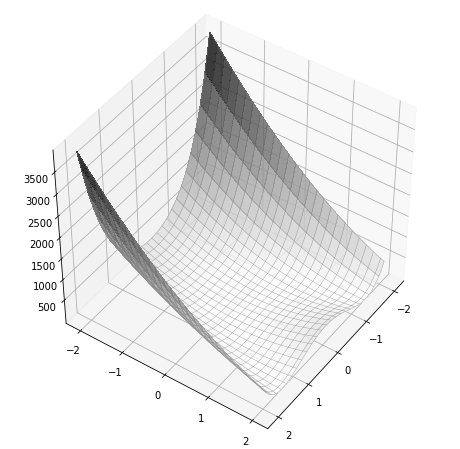

In [1]:
from EOS.benchmarks import Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

## Estrategia (1+1)

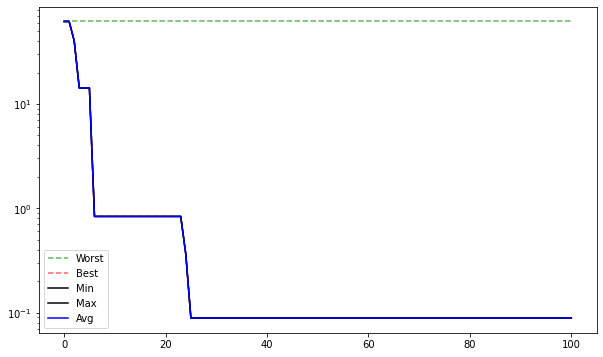

In [2]:
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor
from EAOS.operators import MutationGaussian, SelectionBest

MU = 1
NGEN = 100

monte_carlo = RandomUniform(
    pop_size=MU,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

evaluator = FnEvaluator(fn)

monitor = Monitor()

mutate = MutationGaussian(
    sigma=0.5,
    seed=123456,
)

select_best = SelectionBest(k=MU)

#
# Algoritmo
#
solution = monte_carlo()
solution = evaluator(solution)
monitor(solution)

for iter in range(NGEN):
    offspring = mutate(solution)
    offspring = evaluator(offspring)
    solution = select_best(solution + offspring)
    monitor(solution)

monitor.plot_stats()

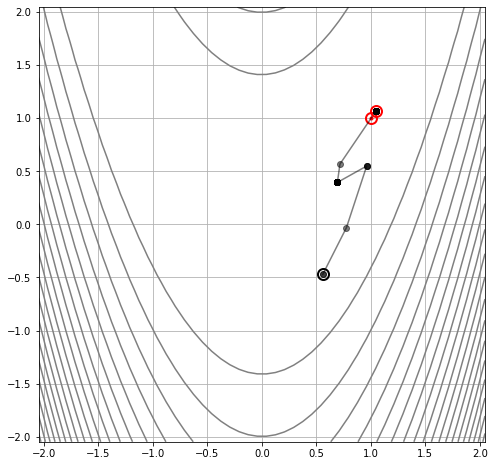

In [3]:
#
# Trayectoria del punto inicial al punto final
#
fn.plot_trayectory(monitor)

In [4]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([1.04589684, 1.06445568]), 0.08880445845496382)

## Estrategia ($\mu$ + 1)

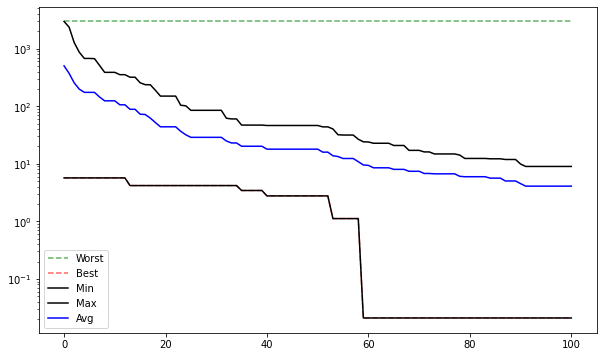

In [5]:
import numpy as np
from EAOS.operators import CrossoverUniform, MutationES, SelectionRandom, Mapper

MU = 20
LAMBDA = 1
NGEN = 100

#
# Operador para crear una población inicial aleatoria
#
monte_carlo = RandomUniform(
    pop_size=MU,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

#
# Función que se aplica a cada individuo de la población
#
rng = np.random.default_rng(12345)

def mapfn(individual):
    individual["ES_sigma"] = rng.uniform(low=0.4, high=0.9, size=2)
    return individual

mapper = Mapper(fn=mapfn)
evaluator = FnEvaluator(fn)
monitor = Monitor()
parent_selection = SelectionRandom(k=LAMBDA, seed=123456)
crossover = CrossoverUniform(seed=123456)
mutate = MutationES(seed=123456)
select_best = SelectionBest(k=MU)

#
# Algoritmo
#
population = monte_carlo()
population = mapper(population)
population = evaluator(population)
monitor(population)

for iter in range(NGEN):

    p1 = parent_selection(population)
    p2 = parent_selection(population)
    offspring = crossover(p1, p2)
    offspring = mutate(offspring)
    offspring = evaluator(offspring)
    population = select_best(population + offspring)
    monitor(population)

monitor.plot_stats()

In [6]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.86232467, 0.7480617 ]), 0.020941751171159265)

## Estrategia ($\mu$ + $\lambda$)

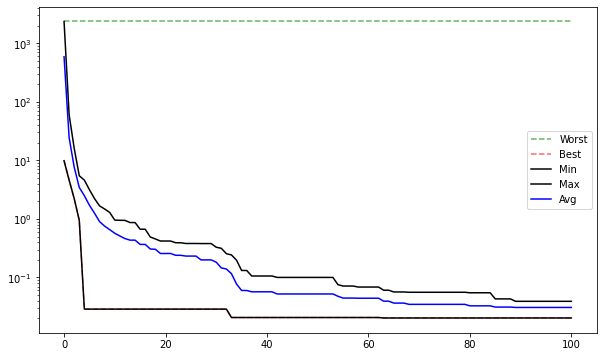

In [7]:
import numpy as np
from EAOS.operators import CrossoverUniform, MutationES, SelectionRandom, Mapper

MU = 10
LAMBDA = 20
NGEN = 100

rng = np.random.default_rng(12345)

monte_carlo = RandomUniform(
    pop_size=MU,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

def mapfn(individual):
    individual["ES_sigma"] = rng.uniform(low=0.4, high=0.9, size=2)
    return individual

mapper = Mapper(fn=mapfn)
evaluator = FnEvaluator(fn)
monitor = Monitor()
parent_selection = SelectionRandom(k=LAMBDA, seed=123456)
crossover = CrossoverUniform(seed=123456)
mutate = MutationES(seed=123456)
select_best = SelectionBest(k=MU)

#
# Algoritmo
#
population = monte_carlo()
population = mapper(population)
population = evaluator(population)
monitor(population)

for iter in range(NGEN):

    p1 = parent_selection(population)
    p2 = parent_selection(population) 
    offspring = crossover(p1, p2)    
    offspring = mutate(offspring)
    offspring = evaluator(offspring)
    population = select_best(population + offspring)
    monitor(population)

monitor.plot_stats()

In [8]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.92888069, 0.87517756]), 0.02033050981667599)

## Estrategias ($\mu$ + $\lambda$) y ($\mu$ , $\lambda$) Auto-adaptativas

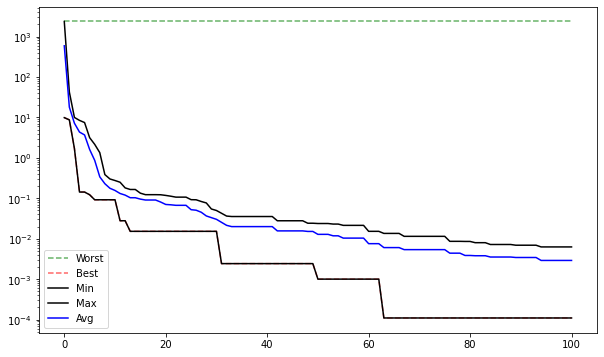

In [9]:
from EAOS.operators import MutationSelfAdaptiveES


def runES(STRATEGY):

    MU = 10
    LAMBDA = 20
    NGEN = 100

    rng = np.random.default_rng(12345)

    monte_carlo = RandomUniform(
        pop_size=MU,
        low=fn.LB,
        high=fn.UB,
        seed=123456,
        ES_sigma=[0.5] * 2,
    )

    
    monitor = Monitor()
    
    evaluator = FnEvaluator(fn)
    parent_selection = SelectionRandom(k=LAMBDA, seed=123456)
    crossover = CrossoverUniform(seed=123456)
    mutate = MutationSelfAdaptiveES(sigma_min=0.1, sigma_max=1.0, seed=123456)
    select_best = SelectionBest(k=MU)

    #
    # Algoritmo
    #
    population = monte_carlo()
    population = evaluator(population)
    monitor(population)

    for iter in range(NGEN):

        p1 = parent_selection(population)
        p2 = parent_selection(population)
        offspring = crossover(p1, p2)
        offspring = mutate(offspring)
        offspring = evaluator(offspring)

        if STRATEGY == "+":
            population = select_best(population + offspring)
        else:
            population = select_best(offspring)
            
        monitor(population)

    return monitor


monitor = runES(STRATEGY="+")
monitor.plot_stats()

In [10]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([1.00818068, 1.01708329]), 0.00010982660269265056)

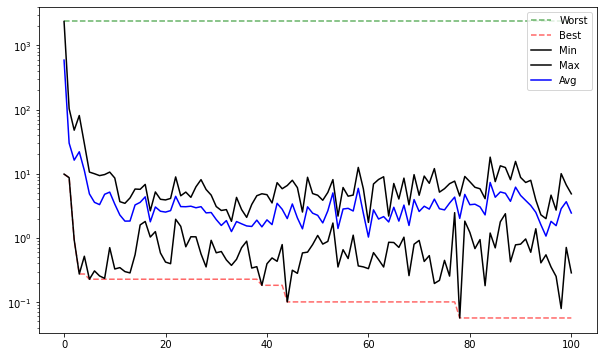

In [11]:
monitor = runES(STRATEGY="-")
monitor.plot_stats()

In [12]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.81573233, 0.68049204]), 0.05667349260723531)